In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt

# User-defined
from helpers import train_test_data, plot_sols

In [2]:
# Generate continuation data
train_dataset, test_dataset, info = train_test_data()



Iter Cont     Iter Corr     Residual      Freq          Energy        Step          Beta          
0             0             1.2826e-01    0.0955        5.0861e-02                                
0             1             4.2430e-03    0.0955        1.9854e-02                                
0             2             9.4199e-07    0.0955        1.9376e-02                                
1             0             8.2709e-07    0.0955        1.9391e-02    -5.000e-03                  
1             1             1.9545e-13    0.0955        1.9392e-02    -5.000e-03    0.0022        
--------------------------------------------------------------------------------------------------
2             0             5.4762e-07    0.0956        1.9423e-02    -1.000e-02                  
2             1             1.2469e-13    0.0956        1.9423e-02    -1.000e-02    0.0039        
--------------------------------------------------------------------------------------------------
3       

In [3]:
train_dataset['x'].shape, train_dataset['dx'].shape, train_dataset['ddx'].shape, train_dataset['t'].shape, train_dataset['f'].shape

((240, 2171), (240, 2171), (240, 2171), (240, 2171), (240, 2171))

In [4]:
info

{'delta': 0.05,
 'alpha': 1.0,
 'beta': 1.0,
 'M': 1.0,
 'K': 1.0,
 'C': 0.05,
 'NL': 1.0,
 'train_n_datapoints': 521040,
 'test_n_datapoints': 132431,
 'qmax': 3.539038022161649,
 'qdmax': 9.197666668716968,
 'qddmax': 41.03203098968057,
 't': 9.23405928306095,
 'fmax': 1.0}

#### Periodic Solutions && NLFR Curve

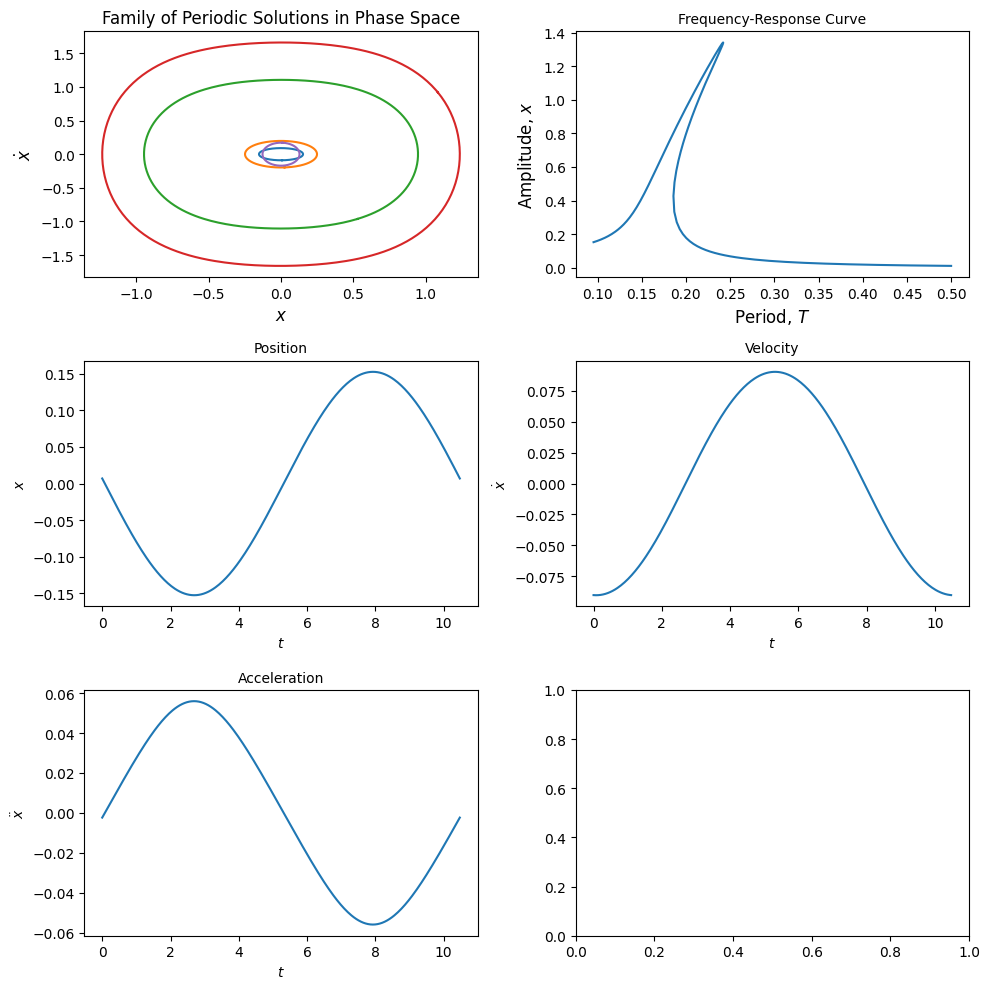

In [5]:
plot_sols(file='data/FRF1')